In [151]:
#Load libraries

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score

#matplotlib.style.use('ggplot')

In [117]:
df_raw = pd.read_csv("./Graduation_Outcomes_-_School_Level_-_Classes_of_2005-2011_-_Ethnicity.csv")

df_raw.head()

#df_raw.columns

,DBN,School Name,Cohort Year,Cohort Category,Demographic,Total Cohort Num,Total Grads Num,Total Grads Pct of cohort,Total Regents Num,Total Regents Pct of cohort,...,Regents w/o Advanced Num,Regents w/o Advanced Pct of cohort,Regents w/o Advanced Pct of grads,Local Num,Local Pct of cohort,Local Pct of grads,Still Enrolled Num,Still Enrolled Pct of cohort,Dropped Out Num,Dropped Out Pct of cohort
0,01M056,CORLEARS SCHOOL,2001,4 Year June,Hispanic,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,01M056,CORLEARS SCHOOL,2001,5 Year,Hispanic,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
2,01M056,CORLEARS SCHOOL,2001,6 Year,Hispanic,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
3,01M056,CORLEARS SCHOOL,2003,4 Year June,Hispanic,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
4,01M056,CORLEARS SCHOOL,2003,5 Year,Hispanic,1,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s


In [77]:
#Analysis Plan: 
#Get model first (with the most clean data as possible, then start adding additional data)
#Linear
#Decision tree

#1. Drop rows with NaN
#2. Replace NAs with average (Titanic - replaced with median age)

In [78]:
#Pick which columns you need

df_simple = df_raw[['Demographic', 'Total Grads Pct of cohort']]

#Rename columns
df_simple.rename(columns={'Demographic': 'demographic', 'Total Grads Pct of cohort': 'total_grads_pct'}, inplace=True)

df_simple.head()

,demographic,total_grads_pct
0,Hispanic,s
1,Hispanic,s
2,Hispanic,s
3,Hispanic,s
4,Hispanic,s


In [79]:
#Drop the rows with the s values

df_simple = df_simple[df_simple.total_grads_pct != 's']

df_simple.columns

Index([u'demographic', u'total_grads_pct'], dtype='object')

In [80]:
#Remove the % from total_grads_pct and converting it to a numeric value

df_simple.total_grads_pct = df_simple['total_grads_pct'].apply(lambda x: float(x.replace('%', "")))

In [81]:
#Converting demographic groups into dummy variables
demographic_dummy = pd.get_dummies(df_simple.demographic)

#join the new dummy variables back into the larger dataset
df_simple1 = df_simple.join(demographic_dummy)

#Drop the demographic column
df_simple1 = df_simple1.drop(['demographic'], axis=1)

df_simple1.head()

,total_grads_pct,Asian,Black,Hispanic,White
25,65.2,0.0,1.0,0.0,0.0
26,62.5,0.0,1.0,0.0,0.0
27,65.2,0.0,1.0,0.0,0.0
28,76.2,0.0,1.0,0.0,0.0
29,81.0,0.0,1.0,0.0,0.0


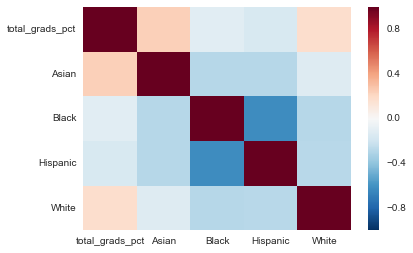

In [82]:
#Visualization tools (seaborn, matplot)

sns.heatmap(df_simple1.corr())

In [84]:
#Check for skewness
df_simple["total_grads_pct"].skew() 

-0.55027273435432245

In [85]:
#Calculate the average graduation percentages for all groups  

print "Average Graduation Percentages for All Groups", df_simple.total_grads_pct.mean()
print "Average Graduation Percentages for Asians", df_simple[df_simple['demographic'] =='Asian'].mean()
print "Average Graduation Percentages for Whites", df_simple[df_simple['demographic'] =='White'].mean()
print "Average Graduation Percentages for Blacks", df_simple[df_simple['demographic'] =='Black'].mean()
print "Average Graduation Percentages for Hispanics", df_simple[df_simple['demographic'] =='Hispanic'].mean()

Average Graduation Percentages for All Groups 67.6162807018
Average Graduation Percentages for Asians total_grads_pct    81.4485
dtype: float64
Average Graduation Percentages for Whites total_grads_pct    78.092231
dtype: float64
Average Graduation Percentages for Blacks total_grads_pct    64.714963
dtype: float64
Average Graduation Percentages for Hispanics total_grads_pct    63.340469
dtype: float64


In [86]:
#Calculate the standard deviation for total graduation percentages
print df_simple.total_grads_pct.std()

20.9333411347


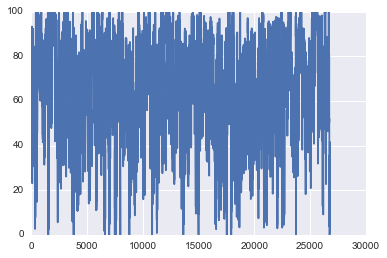

In [87]:
#Why is the data in such a wide range? Figure out the ranges, zoom in and reduce # of samples

plt.plot(df_simple1["total_grads_pct"])

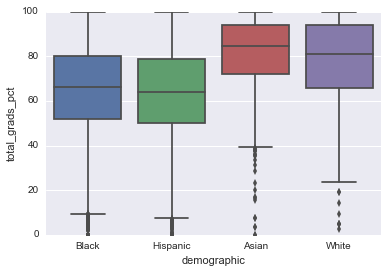

In [88]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="demographic", y="total_grads_pct", data=df_simple)

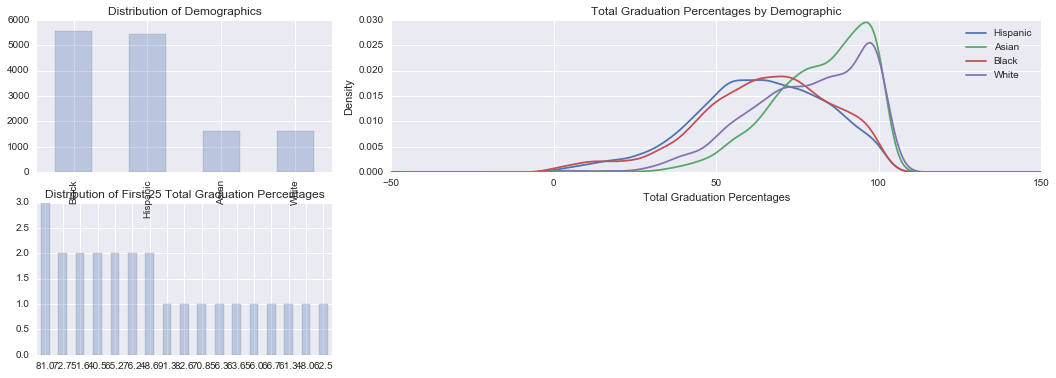

In [89]:
#Creating charts

fig = plt.figure(figsize=(18,6)) 

plot_1 = plt.subplot2grid((2,3),(1,0))
total_grad_pct_25 = df_simple.total_grads_pct[:25]
total_grad_pct_25.value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of First 25 Total Graduation Percentages")  
locs, labels = plt.xticks()
plt.setp(labels, rotation=0)

plot_2 = plt.subplot2grid((2,3),(0,1), colspan=2)
df_simple['total_grads_pct'][df_simple['demographic'] == 'Hispanic'].plot(kind='kde')  
df_simple['total_grads_pct'][df_simple['demographic'] == 'Asian'].plot(kind='kde')  
df_simple['total_grads_pct'][df_simple['demographic'] == 'Black'].plot(kind='kde') 
df_simple['total_grads_pct'][df_simple['demographic'] == 'White'].plot(kind='kde')  
plt.xlabel("Total Graduation Percentages")    
plt.title("Total Graduation Percentages by Demographic")
plt.legend(('Hispanic', 'Asian', 'Black', 'White'),loc='best') 

plot_3 = plt.subplot2grid((2,3),(0,0))              
df_simple['demographic'].value_counts().plot(kind='bar', alpha=.3)
plt.title("Distribution of Demographics")

In [259]:
# 2 - Split the data into train and test sets

X = df_simple1[['Hispanic', 'Asian', 'White']]
y = df_simple1.total_grads_pct

#random_state is just a seed value for the initial state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print "Coefs: ", model.coef_
print "Intercept: ", model.intercept_
print "RSquared Train: ", model.score(X_train, y_train)
print "RSquared Test: ", model.score(X_test, y_test)

Coefs:  [ -1.00677461  17.00245833  13.60919779]
Intercept:  64.5015909674
RSquared Train:  0.101596217016
RSquared Test:  0.101965048182


In [91]:
# Optional: Convert them back into dataframes, for convenience
train = pd.DataFrame(data=X_train, columns=['Hispanic', 'Asian', 'White', 'Black', 'total_grads_pct'])
train['default'] = y_train

test = pd.DataFrame(data=X_test, columns=['Hispanic', 'Asian', 'White', 'Black', 'total_grads_pct'])
test['default'] = y_test

In [95]:
#Specifying the integer type for y_train 
y_train = y_train.astype(int)

In [105]:
#3 - Fit the model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

B1 = model.coef_[0][0]
B0 = model.intercept_[0]
np.exp(B1)

print "coefficients", B1
print "intercept", B0

zip(names_X, np.exp(model.coef_[0]) - 1)

coefficients -1.60087928834
intercept -4.92770353046


[('Hispanic', -0.79828092923395255),
 ('Asian', -0.63385541684339353),
 ('White', -0.79892459499433266),
 ('Black', -0.51228397694771266)]

In [103]:
X_test = X_test.astype(int)
y_test = y_test.astype(int)

print 'training misclassification =', model.score(X_train, y_train)
print 'testing misclassification =', model.score(X_test, y_test)

#The generalization error is higher than the training error. That makes sense since the model should better fit the training set.  

training misclassification = 0.0404010025063
testing misclassification = 0.0437426900585


In [183]:
print df_simple1[df_simple1['Asian'] == 1.0]['Asian'].count()
print df_simple1[df_simple1['White'] == 1.0]['White'].count()
print df_simple1[df_simple1['Black'] == 1.0]['Black'].count()
print df_simple1[df_simple1['Hispanic'] == 1.0]['Hispanic'].count()

 1633
1609
5547
5461
